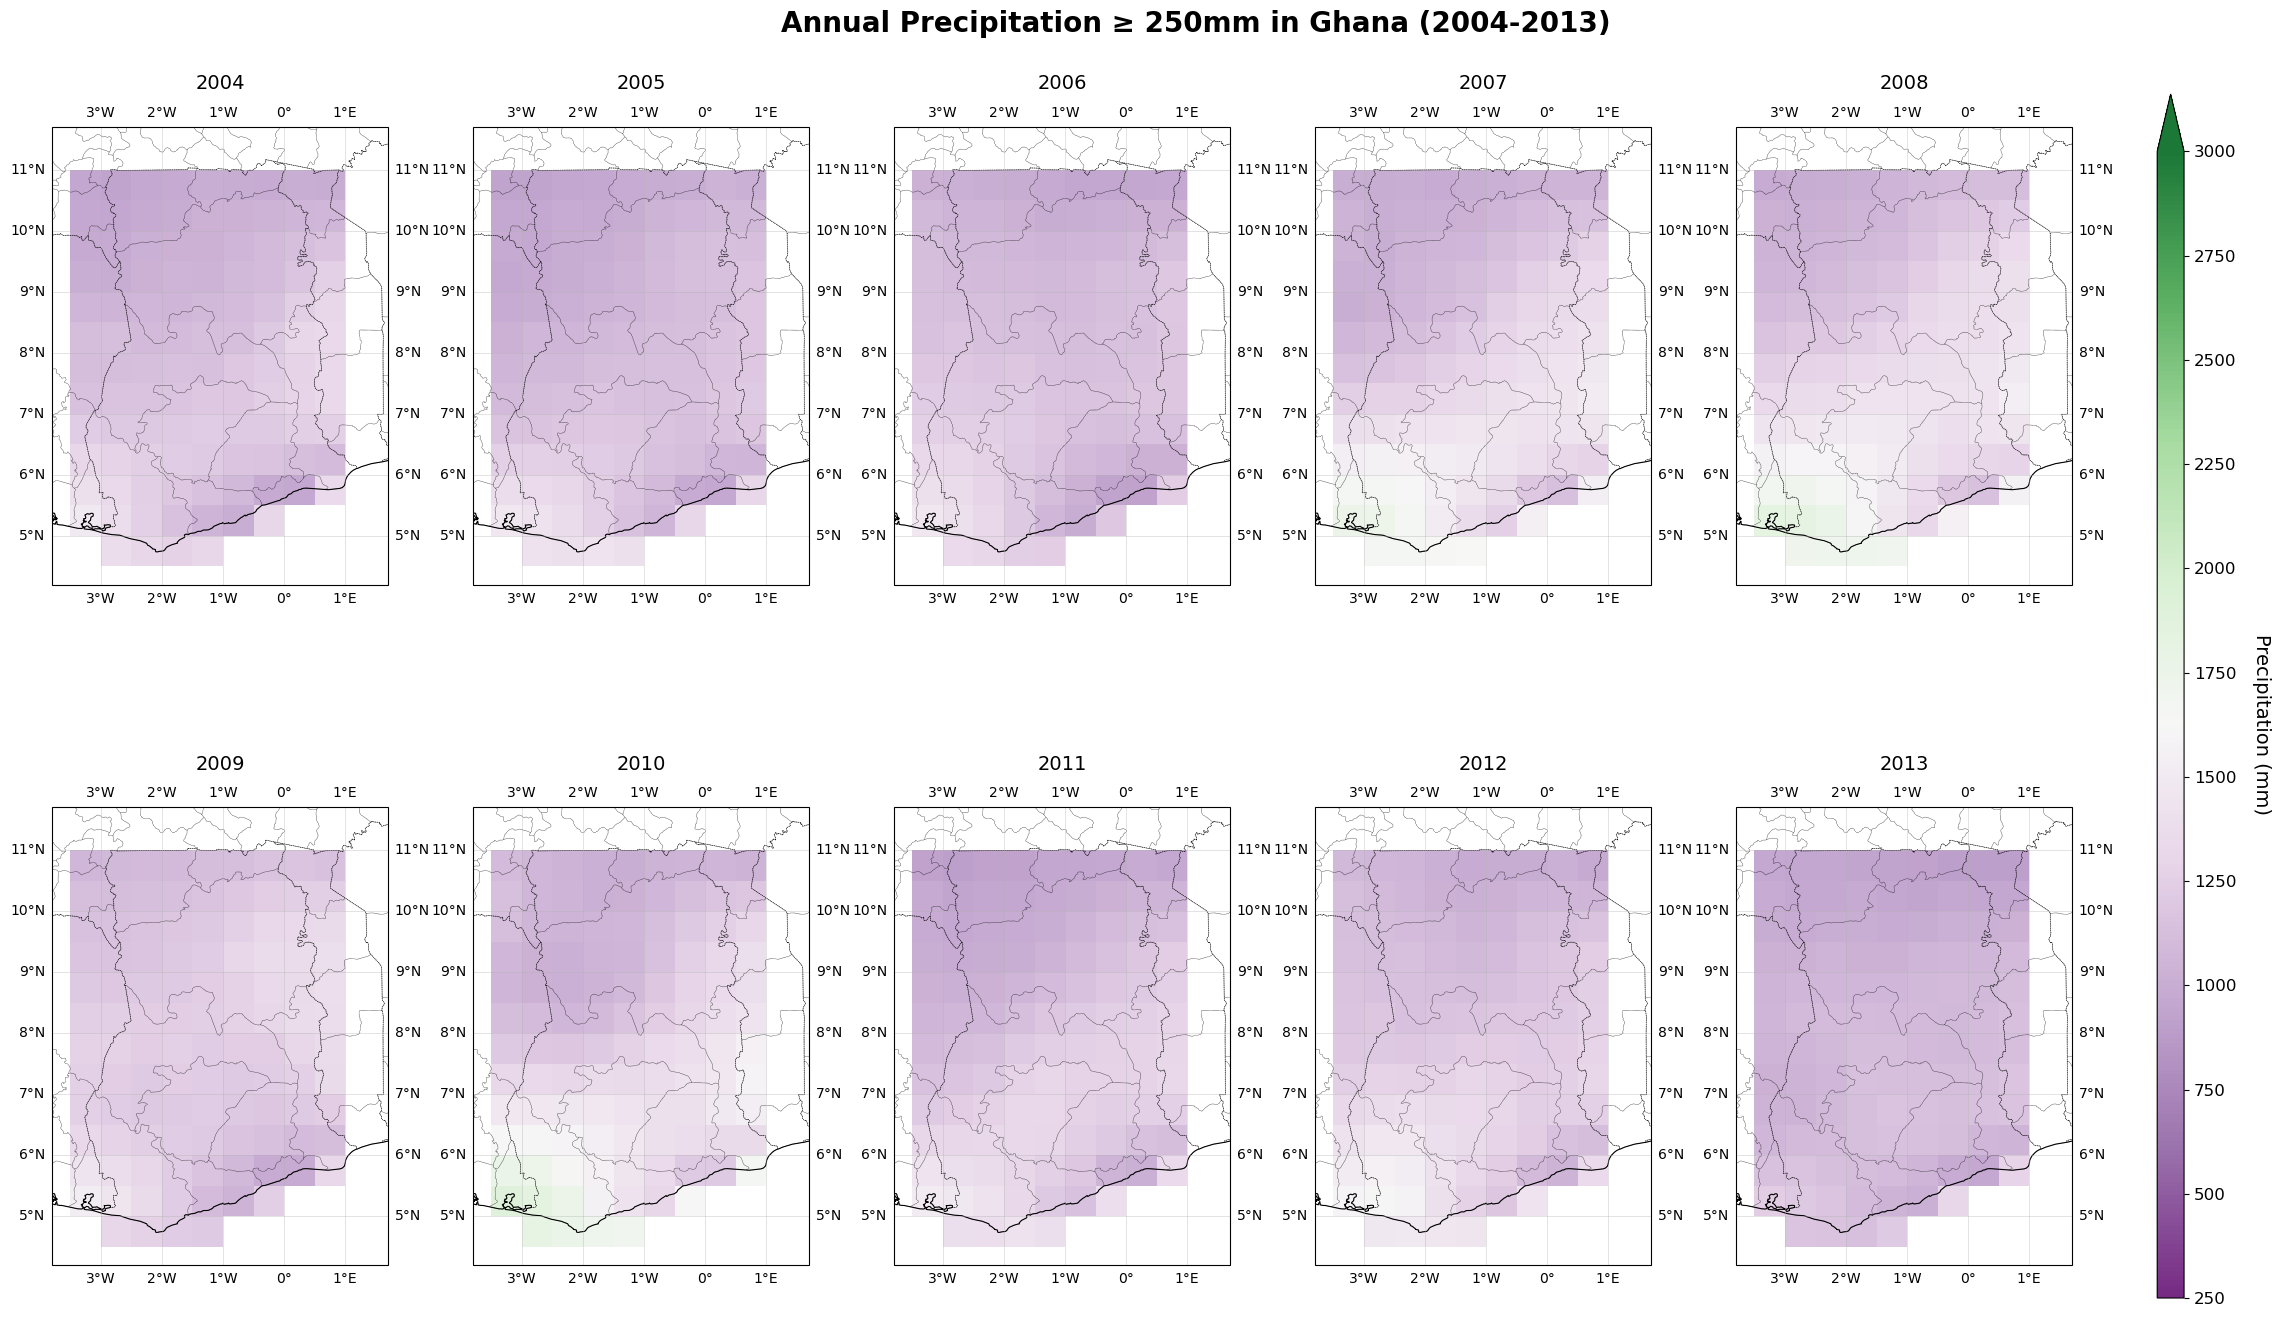

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Load the dataset
file_path = 'Africa_cru_data.nc'
data = xr.open_dataset(file_path)

# Select precipitation variable
precip = data['pre']  # Adjust if your variable has a different name

# Ghana's boundaries
ghana_bounds = {
    'lon': (-3.3, 1.2),
    'lat': (4.7, 11.2)
}

# Create purple-to-green colormap
colors = ["#762a83", "#9970ab", "#c2a5cf", "#e7d4e8", "#f7f7f7", "#d9f0d3", "#a6dba0", "#5aae61", "#1b7837"]
cmap_precip = LinearSegmentedColormap.from_list("precip_colormap", colors, N=256)

# Create figure with larger size to accommodate spacing
fig = plt.figure(figsize=(26, 14))  # Increased figure size
fig.suptitle('Annual Precipitation ≥ 250mm in Ghana (2004-2013)', 
             y=0.98, fontsize=20, weight='bold')  # Adjusted title position

# Create gridspec with increased spacing
gs = fig.add_gridspec(2, 6, hspace=0.3, wspace=0.3,  # Increased hspace and wspace
                     width_ratios=[1,1,1,1,1,0.08])  # Slightly wider colorbar space

# Loop through years 2004-2013
for i, year in enumerate(range(2004, 2014)):
    ax = fig.add_subplot(gs[i//5, i%5], projection=ccrs.PlateCarree())
    
    # Process data
    precip_year = precip.sel(time=str(year))
    precip_ghana = precip_year.sel(
        lon=slice(ghana_bounds['lon'][0], ghana_bounds['lon'][1]),
        lat=slice(ghana_bounds['lat'][0], ghana_bounds['lat'][1])
    )
    annual_precip = precip_ghana.sum(dim='time')
    masked_precip = annual_precip.where(annual_precip >= 250)
    
    # Create plot with new colormap
    img = masked_precip.plot(ax=ax, add_colorbar=False, 
                           cmap=cmap_precip, vmin=250, vmax=3000)
    
    # Set map extent
    buffer = 0.5
    ax.set_extent([ghana_bounds['lon'][0]-buffer, ghana_bounds['lon'][1]+buffer, 
                   ghana_bounds['lat'][0]-buffer, ghana_bounds['lat'][1]+buffer])
    
    # Add clean map features
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
    ax.add_feature(cfeature.STATES, linestyle=':', linewidth=0.3)
    
    ax.set_title(f'{year}', fontsize=14, pad=12)  # Increased font size and padding
    ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)

# Add colorbar
cbar_ax = fig.add_subplot(gs[:, 5])
cbar = plt.colorbar(img, cax=cbar_ax, orientation='vertical', extend='max')
cbar.set_label('Precipitation (mm)', labelpad=25, rotation=270, fontsize=14)  # Increased font size
cbar.set_ticks(np.arange(250, 3250, 250))
cbar.ax.tick_params(labelsize=12)  # Increased tick label size

# Adjust layout with more padding
plt.subplots_adjust(left=0.06, right=0.88, bottom=0.06, top=0.92)  # Increased padding

# Save figure
plt.savefig('Ghana_Precipitation_2004-2013.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()